# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
import json
btc_price=requests.get(btc_url).json()
btc_price_data=btc_price["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
import json
eth_price=requests.get(eth_url).json()
eth_price_data=eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crypto
my_btc_value = my_btc * btc_price_data
my_eth_value = my_eth * eth_price_data

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $41745.60
The current value of your 5.3 ETH is $11327.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    limit=1000,
).df

# Preview DataFrame
df_ticker.head(10)

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-06-23 00:00:00-04:00  115.06  115.138  114.9900  115.05  5000374  423.19   
2021-06-24 00:00:00-04:00  115.10  115.170  115.0450  115.07  6672880  424.89   
2021-06-25 00:00:00-04:00  115.11  115.130  114.7516  114.89  3987588  425.90   
2021-06-28 00:00:00-04:00  115.04  115.230  115.0400  115.16  5523690  427.17   

                                                               
                               high     low   close    volume  
time                                                           
2021-06-23 00:00:00-04:00  424.0500  422.51  422.60  41476351  
2021-06-24 00:00:00-04:00  425.5500  424.62  425.09  39863529  
2021-06-25 00:00:00-04:00  427.0943  425.55  426.57  50460394  
2021-06-28 00:00:00-04:00  427.6500  425.89  427.48  43937373

In [9]:
df_ticker.dtypes

AGG  open      float64
     high      float64
     low       float64
     close     float64
     volume      int64
SPY  open      float64
     high      float64
     low       float64
     close     float64
     volume      int64
dtype: object

In [10]:
# Pick AGG and SPY close prices
agg_close_price =float(df_ticker["AGG"]["close"][0])
spy_close_price =float(df_ticker["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.05
Current SPY closing price: $422.6


In [11]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21130.00
The current value of your 200 AGG shares is $23010.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000 

# Consolidate financial assets data
savings_data={my_btc_value+my_eth_value,my_spy_value+my_agg_value,}

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data,columns=["amount"],index=["crypto","shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,53072.919
shares,44140.000


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

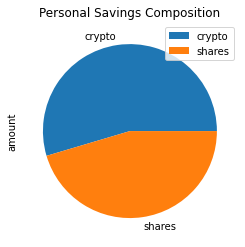

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount",title="Personal Savings Composition")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings=float(df_savings.sum())

# Validate saving health
if total_savings>emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings== emergency_fund:
    print("Great, you have saved three times your monthly expenses! Kepp pushing to increase your savings.")
else:
    print(f"You are ${emergency_fund-total_savings:0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data=alpaca.get_barset(
    tickers, 
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head(10)

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-10 00:00:00-04:00  108.60  108.6600  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872.0   

                              SPY                                        
                             open    high     low    close       volume  
time                                                                     
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN          NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183.0  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594.0  
2017-05-18 00:00:00-04:00  235.70  237.75  235.43  236.670   82965499.0  
2017-05-19 00:00:00-04:00  237.33  239.08  237.27  238.300   69366163.0  
2017-05-22 00:00:00-04:00  238.90  239.71  238.82  239.530   37630972.0  
2017-05-23 00:00:00-04:00  239.95  240.24  239.51  240.020   36771135.0

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252*30)

In [18]:
# Printing the simulation input data
MC_30_years.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997735,1.014748,0.999351,0.999911,0.993507,1.027895,1.004827,0.997378,0.989399,1.014476,...,0.998667,1.002647,1.010211,1.005114,1.003690,0.996418,1.000608,0.997851,0.979031,0.983885
2,1.003046,1.006437,0.998452,1.001442,0.995693,1.033007,1.006784,0.997982,0.977692,1.005620,...,0.994759,0.997482,1.015976,1.006139,1.000516,0.992760,0.989472,1.006379,0.973468,0.974806
3,0.982126,1.009016,1.018584,0.992952,0.999030,1.039498,0.997700,1.002116,0.975922,1.012941,...,1.005034,0.998248,1.006644,1.007348,1.002143,0.992186,1.000693,1.007251,0.981786,0.964617
4,0.982932,1.002235,1.015362,0.988722,0.994480,1.043053,1.006615,0.985873,0.976416,1.011929,...,1.014694,1.013056,1.022622,1.013598,0.997762,0.985285,1.001600,1.009951,0.982173,0.957927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,12.274790,7.172834,9.589589,28.077347,42.482616,10.101940,11.650561,17.078245,26.409966,26.578402,...,4.763068,18.032617,23.240730,5.806236,29.865735,41.858182,6.816881,12.403210,13.675617,83.189691
7557,12.450141,7.204534,9.522579,28.004913,42.462968,10.090678,11.830437,17.032020,26.241861,26.962993,...,4.689523,18.134988,23.446868,5.832187,29.641720,41.660670,6.811314,12.513621,13.728587,83.969066
7558,12.533678,7.248258,9.518197,27.751778,42.607155,10.029574,11.848783,16.828809,26.287574,26.924369,...,4.679019,18.024035,23.206297,5.876212,29.903116,41.570979,6.874702,12.482067,13.386248,83.446783
7559,12.587078,7.212344,9.495235,27.581757,41.974131,9.941187,11.854919,16.869729,25.909363,26.641830,...,4.631035,18.079021,23.050293,5.885130,29.592821,41.664093,6.891904,12.690804,13.499680,82.853343


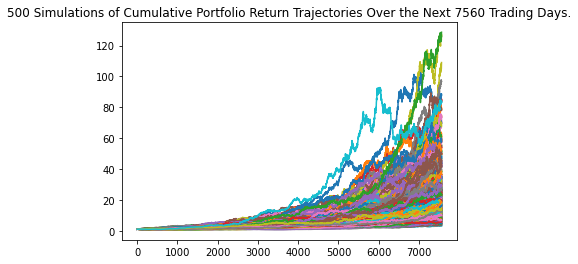

In [20]:
# Plot simulation outcomes
line_plot=MC_30_years.plot_simulation()

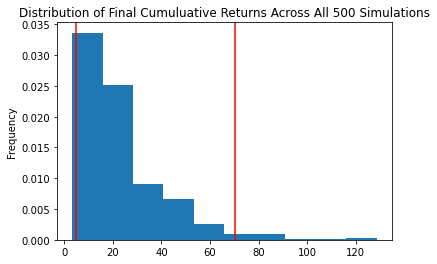

In [21]:
# Plot probability distribution and confidence intervals
distribution_plot=MC_30_years.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics=MC_30_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             23.175551
std              17.818877
min               3.183302
25%              11.384211
50%              18.501865
75%              29.269262
max             128.648118
95% CI Lower      4.561500
95% CI Upper     70.415435
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
lower_confidence_interval=round(summary_statistics[8]*initial_investment,2)
upper_confidence_interval=round(summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_confidence_interval} and ${upper_confidence_interval}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $91230.0 and $1408308.7


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
lower_confidence_interval=round(summary_statistics[8]*initial_investment,2)
upper_confidence_interval=round(summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_confidence_interval} and ${upper_confidence_interval}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $136844.99 and $2112463.05


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [30]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")